In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from jupyterthemes import jtplot

jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

## Underfitting и overfitting

### Обобщающая способность

Рассмотрим пример классификации двух видов бабочек по двум параметрам - цвету и размаху крыльев. На первой картинке показаны исходные данные. Вы можете представить некоторую кривую, которая идеально разделяет эти два класса. Но после добавления новых точек окажется, что наша модель неспособна уловить зависимости в новых данных и допустит много ошибок. Здесь старые точки обведены в белый контур.

<img src='https://developers.google.com/machine-learning/crash-course/images/GeneralizationA.png' width= "400px" >
<img src = 'https://developers.google.com/machine-learning/crash-course/images/GeneralizationC.png' width='400px'>

Важной характеристикой алгоритма машинного обучения является его обобщающая способность — способность использовать знания, полученные при обучении, на новых данных. Обобщающая способность часто страдает из-за двух основных проблем машинного обучения: overfitting (переобучение) и underfitting.

Эти две проблемы зависят друг от друга, поэтому для их решения нужно решать так называемую дилемму Bias-variance tradeoff. Разберем обе эти проблемы и методы борьбы с ними.

### [Bias-variance tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)

**Переобучение (overfitting)** — проблема, при которой алгоритм чувствителен к незначительным колебаниям в данных в процессе обучения, в следствие чего алгоритм "выучивает" слишком сложную зависимость в данных, которая на самом деле должна быть проще. Другое определение проблемы — **high variance (высокая вариативность)**. Более формальное определение можно получить из области статистики: [Variance (дисперсия случайной величины)](https://en.wikipedia.org/wiki/Variance).

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Overfitting.svg/400px-Overfitting.svg.png' width = '400px'>

[Источник изображения](https://en.wikipedia.org/wiki/Overfitting)

**Underfitting** — проблема, при которой алгоритм недостаточно хорошо "изучил" данные и пропускает важные зависимости между признаками. Еще одно название проблемы —  **high bias (высокое смещение)**. Более формальное определение можно найти в статистике: [Bias of an estimator (Несмещенная оценка)](https://en.wikipedia.org/wiki/Bias_of_an_estimator)

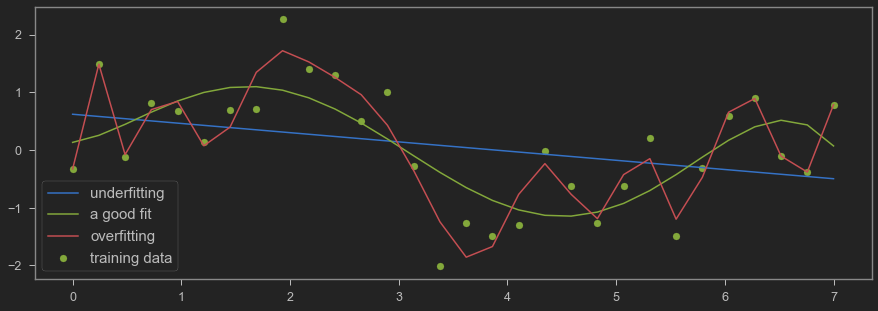

In [11]:
n_points = 30
x = np.linspace(0., 7., n_points)
y = np.sin(x) + np.random.randn(n_points)
plt.figure(figsize=(15, 5))
plt.scatter(x, y, color='g', label='training data')

for degree, label in zip([1, 5, 30], ['underfitting', 'a good fit', 'overfitting']):
    polynomial_coef = np.polyfit(x, y, deg=degree)
    inter_poly = np.polynomial.Polynomial(polynomial_coef[::-1])
    plt.plot(x, inter_poly(x), label=label)
plt.legend(fontsize=15)

### Как обнаружить переобучение

Переобучение является наиболее популярной проблемой, поэтому ее необходимо уметь обнаруживать моментально. При переобучении кривая значения функции ошибки на тренировочных данных показывает значительное убывание ошибки, в то время как на валидационной выборке значение ошибки меняется слабо, а иногда и вовсе деградирует.

<img src = 'https://developers.google.com/machine-learning/crash-course/images/RegularizationTwoLossFunctions.svg' width = '800px'>

### Как избавиться от переобучения

Существует несколько путей ограничить переобучение, с некотороми из них мы уже познакомились:
1. Отложенная выборка (hold-out)
2. k-fold валидация (или leave-one-out валидация)
3. Уменьшение сложности модели
4. Добавление данных
5. Регуляризация

_**Отложенная выборка**_ является отличным средством проверять точность алгоритма на этапе валидации, но позволить выделить такую выборку мы можем только в случае, если обладаем достаточным объемом данных.

В случае, если данных мало, на помощь приходит _**k-fold валидация**_ или валидация с одним отложенным примером (leave-one-out). Минусы этого подхода в том, что приходится оценивать модель, используя результаты с разных подмножеств валидационных данных, поэтому не всегда очевидно, какая модель является лучшей.

_**Уменьшение сложности**_ модели является основным способом борьбы с переобучением, т.к. по сути завышенная сложность модели и является его природой. В нашем примере полином степени 30 является сложной моделью, поэтому логично заключить, что нужно уменьшить степень интерполирующего полинома.

_**Увеличение объема обучающей выборки**_ также помогает избавиться от переобучения. Представьте, как при добавлении таких же зашумленных черных точек на график выше зеленая кривая будет чаще "промахиваться" по ним и постепенно сходиться к оранжевой линии, говоря о хорошей найденной зависимости.

Еще один важный способ борьбы с переобучением — _**регуляризация**_, которая заключается в добавлении штрафа модели в случаях, когда она отклоняется от каких-то норм. 

### Как избавиться от underfitting

Для решения проблемы underfitting можно инвертировать некоторые правила для избегания переобучения, поскольку эти две проблемы взаимозависимы. Итак, методы борьбы следующие:
1. Усложнение модели
1. Ослабевание параметров регуляризации

_**Усложнение модели**_ в данном случае поможет, т.к. простая модель может плохо описывать сложные закономерности. Примером усложнения может быть добавление новых признаков в данные, увеличение степени полинома, добавление новых слоев в нейронную сеть и др.

_**Ослабевание параметров регуляризации**_ есть не что иное как уменьшение размера штрафа на модель в случае ее отклонения от некоторых норм. Настройка параметров регуляризации будет также рассмотрена далее в курсе.

### Пример обучения

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
titanic = pd.read_csv(r'C:/Users/Paul/Projects/Skill_Notebooks/Module_5/DataSets/titanic.csv')
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [18]:
# Заменить категориальный признак "Sex" на два признака "female" и "male" с бинарными значениями
sex_dummies = pd.get_dummies(titanic['Sex'])
titanic = titanic.drop('Sex', axis=1).join(sex_dummies)
# Отбросить имя человека из выборки
titanic = titanic.drop('Name', axis=1)
# Отделим target от признаков
X, y = titanic.iloc[:, 1:], titanic.iloc[:, 0]

#### Валидация на hold-out выборке

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,
                                                      y,
                                                      test_size=.2,
                                                      shuffle=True,
                                                      random_state=123)

In [20]:
clf = DecisionTreeClassifier(random_state=456)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=456)

In [21]:
from sklearn.metrics import f1_score
y_pred = clf.predict(X_train)
f1_train = f1_score(y_train, y_pred)
print('[train] F1-score = {:.2f}'.format(f1_train))

[train] F1-score = 0.98


In [22]:
y_pred = clf.predict(X_valid)
f1_val = f1_score(y_valid, y_pred)
print('[valid] F1-score = {:.2f}'.format(f1_val))

[valid] F1-score = 0.71


Как видим, точность при валидации значительно ниже точности при обучении. Проверим это дополнительно с помощью кросс-валидации:

#### Кросс-валидация

In [23]:
from sklearn.model_selection import cross_validate

In [25]:
clf = DecisionTreeClassifier(random_state=456)
cv_metrics = cross_validate(clf,X,y,cv=5, scoring='f1_micro', return_train_score=True)

In [26]:
def plot_cv_metrics(cv_metrics):
    avg_f1_train, std_f1_train = cv_metrics['train_score'].mean(), cv_metrics['train_score'].std()
    avg_f1_valid, std_f1_valid = cv_metrics['test_score'].mean(), cv_metrics['test_score'].std()
    print('[train] F1-score = {:.2f} +/- {:.2f}'.format(avg_f1_train, std_f1_train))
    print('[valid] F1-score = {:.2f} +/- {:.2f}'.format(avg_f1_valid, std_f1_valid))
    
    plt.figure(figsize=(15, 5))

    plt.plot(cv_metrics['train_score'], label='train', marker='.')
    plt.plot(cv_metrics['test_score'], label='valid', marker='.')

    plt.ylim([0., 1.]);
    plt.xlabel('CV iteration', fontsize=15)
    plt.ylabel('F1-score', fontsize=15)
    plt.legend(fontsize=15)

[train] F1-score = 0.98 +/- 0.00
[valid] F1-score = 0.78 +/- 0.04


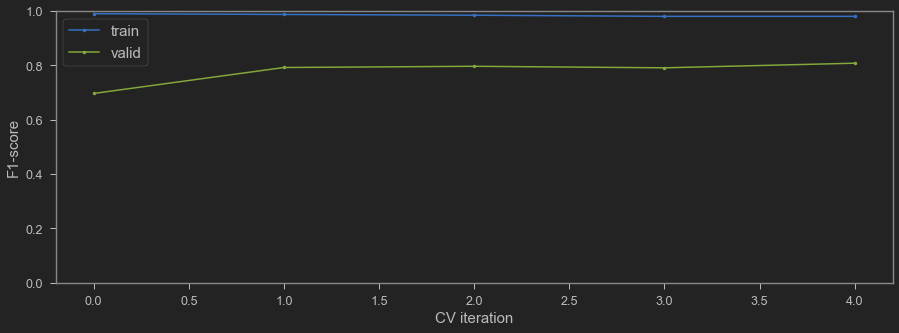

In [27]:
plot_cv_metrics(cv_metrics)

Гипотеза о переобучении подтвердилась. Попробуем избавиться от него, упростив модель — в данном случае ограничим глубину дерева:

[train] F1-score = 0.86 +/- 0.01
[valid] F1-score = 0.83 +/- 0.02


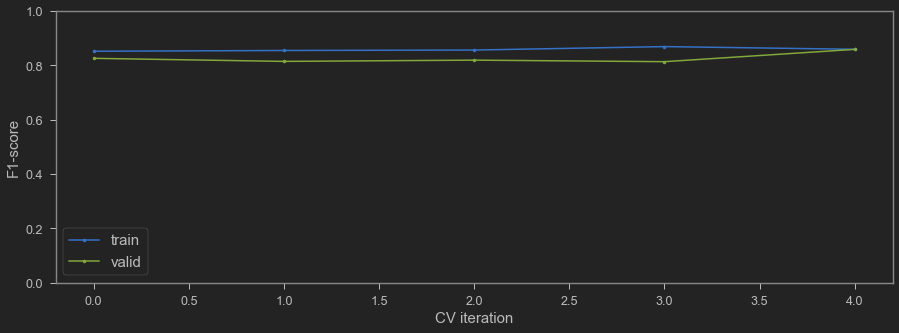

In [28]:
clf = DecisionTreeClassifier(max_depth=5, random_state=456)
cv_metrics = cross_validate(clf, X, y, cv=5, scoring='f1_micro', return_train_score=True)
plot_cv_metrics(cv_metrics)

Итак, метрики при обучении и валидации практически сравнялись, к тому же на валидации значение точности стало выше. Теперь возникает законный вопрос — а можно ли улучшить точность предсказаний? Вполне вероятно, что в данном случае присутствует проблема underfitting. Для ее решения можно заняться созданием новых признаков.

#### Задание

Загрузите данные train.csv, оставьте в данных только признаки 'fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due', 'compliance', затем избавьтесь от пропусков.

Целевой переменной будет 'compliance', разделите данные на обучающую и тестовую выборки в соотношении 70%/30% без перемешивания.

Обучите DecisionTreeClassifier из scikit-learn с параметром random_state=23. Посчитайте значения метрики \(F1\) на тренировочной выборке и на тестовой выборке. Вычтите из значения метрики на тренировочной выборки значение метрики на тестовой выборке и запишите результат в переменную result.

In [30]:
vis_data = pd.read_csv(r'C:/Users/Paul/Projects/Skill_Notebooks/Module_5/DataSets/train.csv', encoding = 'ISO-8859-1', low_memory = False)

In [31]:
vis_data = vis_data[[
    'fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due','compliance'
]]
vis_data = vis_data.dropna()

X = vis_data.drop(['compliance'], axis=1)
y = vis_data['compliance']

In [34]:
# split dataset
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.3, shuffle = False)

In [35]:
# Model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=23)

In [36]:
# Fit model
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=23)

In [37]:
# Check F1 score in train data
from sklearn.metrics import f1_score
y_pred = dt.predict(X_train)
f1_train = f1_score(y_train,y_pred)
print('[train] F1-score = {:.2f}'.format(f1_train))

[train] F1-score = 0.66


In [38]:
# Check F1 score in valid data
y_pred = dt.predict(X_test)
f1_test = f1_score(y_test,y_pred)
print('[train] F1-score = {:.2f}'.format(f1_test))

[train] F1-score = 0.58


In [39]:
result = f1_train-f1_test

## Дисбаланс выборки

**Несбалансированная выборка (imbalanced dataset)** — выборка, в которой количество примеров каких-то классов сильно превалирует над количеством примеров других классов. Это определение также можно расширить на другие типы задач. Например, в задаче регрессии дисбалансом выборки будет ситуация, при которой распределение целевых значений будет сильно отличаться от равномерного.

### Когда считать выборку несбалансированной?

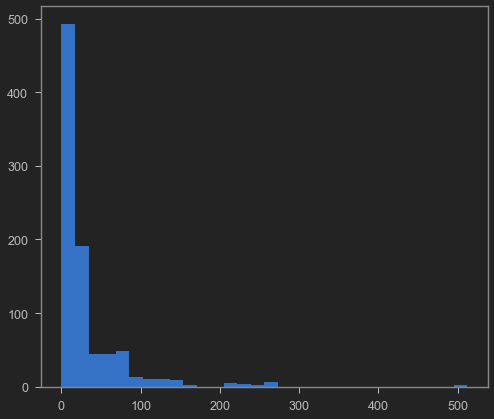

In [41]:
plt.hist(titanic['Fare'], bins=30);

<AxesSubplot:xlabel='Survived', ylabel='count'>

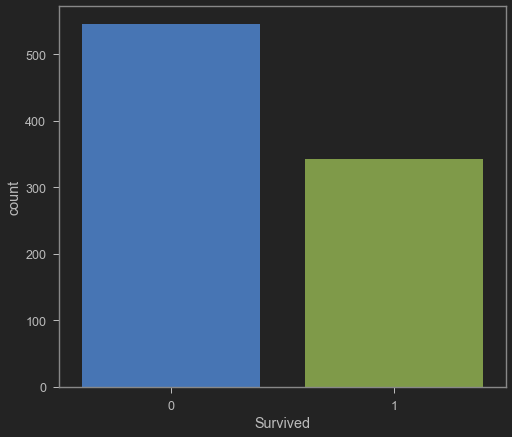

In [42]:
sns.countplot(x='Survived', data=titanic)

Нет точного определения, когда считать выборку несбалансированной. Неформально считается, что выборка несбалансированна, когда отношение количества преобладающего и минорного классов составляет 10:1.and

### Последствия дисбаланса данных

Что происходит при дисбалансе классов:
1. У алгоритма появляется склонность к более популярным классам/значениям.
1. Невозможность использования метрик, не учитывающих веса классов (базовая метрика accuracy, изученная выше, не может быть использована).

### Решение проблемы

1. Изменить целевую метрику — в задачах классификации confusion matrix, precision, recall, F1-score, ROC-кривые будут намного корректнее описывать алгоритм, чем accuracy.
1. Изменить выборку данных: 1) oversampling — увеличение кол-ва объектов классов-меньшинств; 2) undersampling — сокращение кол-ва объектов превалирующих классов.
1. Добавить штраф в оптимизационный функционал, прямо пропорциональный кол-ву объектов каждого класса (веса классов).
1. Возможно, есть смысл перейти к задачам [Anomaly detection](https://en.wikipedia.org/wiki/Anomaly_detection) и [Change detection](https://en.wikipedia.org/wiki/Change_detection).

Во 2-м способе решение проблемы oversampling может быть выполнено как простым дублированием примеров меньшего класса, так и и более сложной техникой, называемой "аугментацией выборки".

**Аугментация выборки (data augmentation)** — процесс генерации примеров из исходных путем их модификации. Примерами аугментации данных могут служить: повороты, масштабирование изображений, применение фильтров; для текста может быть незначительно изменен контекст и изменено склонение/спряжение слов.

Еще одна техника, которая может быть использована для oversampling это **обогащение данных**. При использовании этой техники данные находятся во внешних дополнительных источниках. Например, если банк решает свою скоринговую задачу, он может также расширить свой набор данных данными другого банка при их наличии.

#### Задание

Загрузите данные train.csv, оставьте в данных только признаки 'fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due', 'compliance', затем избавьтесь от пропусков.

Обучим модель на несбалансированных данных. Целевой переменной будет 'compliance', разделите данные на обучающую и тестовую выборки в соотношении 70%/30% без перемешивания.

Обучите DecisionTreeClassifier из scikit-learn с параметром random_state=23. Посчитайте значения метрики \(F1\) на тренировочной выборке и на тестовой выборке.

Затем сделайте эту же выборку сбалансированной с помощью undersampling.

Для этого посчитайте количество примеров (n) класса-меньшинства, затем из класса-большинства возьмите n первых примеров.

То есть, в терминологии Python, возьмите срез (slice) от начала и до n, где n — количество примеров класса, которого в выборке представлено меньше.

Соедините две части выборки (с уменьшенным классом-большинством и с изначальным классом-меньшинством), сделайте точно такое же разбиение, как в задаче выше, и обучите такую же модель.

Посчитайте значение метрики \(F1\) на новой тестовой выборке с помощью новой модели. Вычтите из значения метрики на тестовой части сбалансированной выборки значение метрики на тестовой части несбалансированной выборки и запишите результат в переменную result.

In [79]:
vis_data = pd.read_csv(r'C:/Users/Paul/Projects/Skill_Notebooks/Module_5/DataSets/train.csv', encoding = 'ISO-8859-1', low_memory = False)
vis_data = vis_data[[
    'fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due','compliance'
]]
vis_data = vis_data.dropna()

X = vis_data.drop(['compliance'], axis=1)
y = vis_data['compliance']

In [80]:
# split dataset
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.3, shuffle = False)

In [81]:
# Model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=23)

In [83]:
# Fit model
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=23)

In [84]:
# Check F1 score in train data
from sklearn.metrics import f1_score
y_pred = dt.predict(X_train)
f1_train = f1_score(y_train,y_pred)
print('[train] F1-score = {:.2f}'.format(f1_train))

[train] F1-score = 0.66


In [85]:
# Check F1 score in valid data
y_pred = dt.predict(X_test)
f1_test = f1_score(y_test,y_pred)
print('[train] F1-score = {:.2f}'.format(f1_test))

[train] F1-score = 0.58


<AxesSubplot:xlabel='compliance', ylabel='count'>

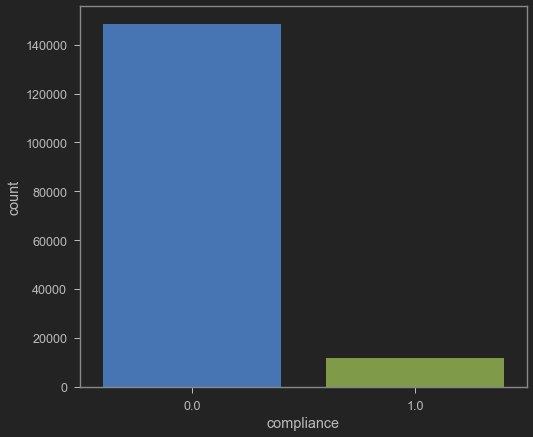

In [86]:
sns.countplot(x='compliance', data=vis_data)

In [87]:
# Number of minority class
n = vis_data['compliance'].value_counts()[1]

In [88]:
major_cl = vis_data[vis_data['compliance'] == 0]
minor_cl = vis_data[vis_data['compliance'] == 1]

In [89]:
major_cl = major_cl.iloc[:n,:]

In [90]:
frames = [major_cl,minor_cl]

In [91]:
vis_data = pd.concat(frames)

In [92]:
X = vis_data.drop(['compliance'], axis=1)
y = vis_data['compliance']

In [93]:
# split dataset
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.3, shuffle = False)

In [94]:
# Fit model
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=23)

In [95]:
y_pred = dt.predict(X_train)
f1_train_balanced = f1_score(y_train,y_pred)
print('[train] F1-score = {:.2f}'.format(f1_train_balanced))

[train] F1-score = 0.92


In [96]:
# Check F1 score in valid data
y_pred = dt.predict(X_test)
f1_test_balanced = f1_score(y_test,y_pred)
print('[train] F1-score = {:.2f}'.format(f1_test_balanced))

[train] F1-score = 0.76


In [97]:
result = f1_test_balanced - f1_test